### 1차,2차

C:\Users\User\AppData\Local\Temp\ipykernel_19212\252502359.py:13: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')


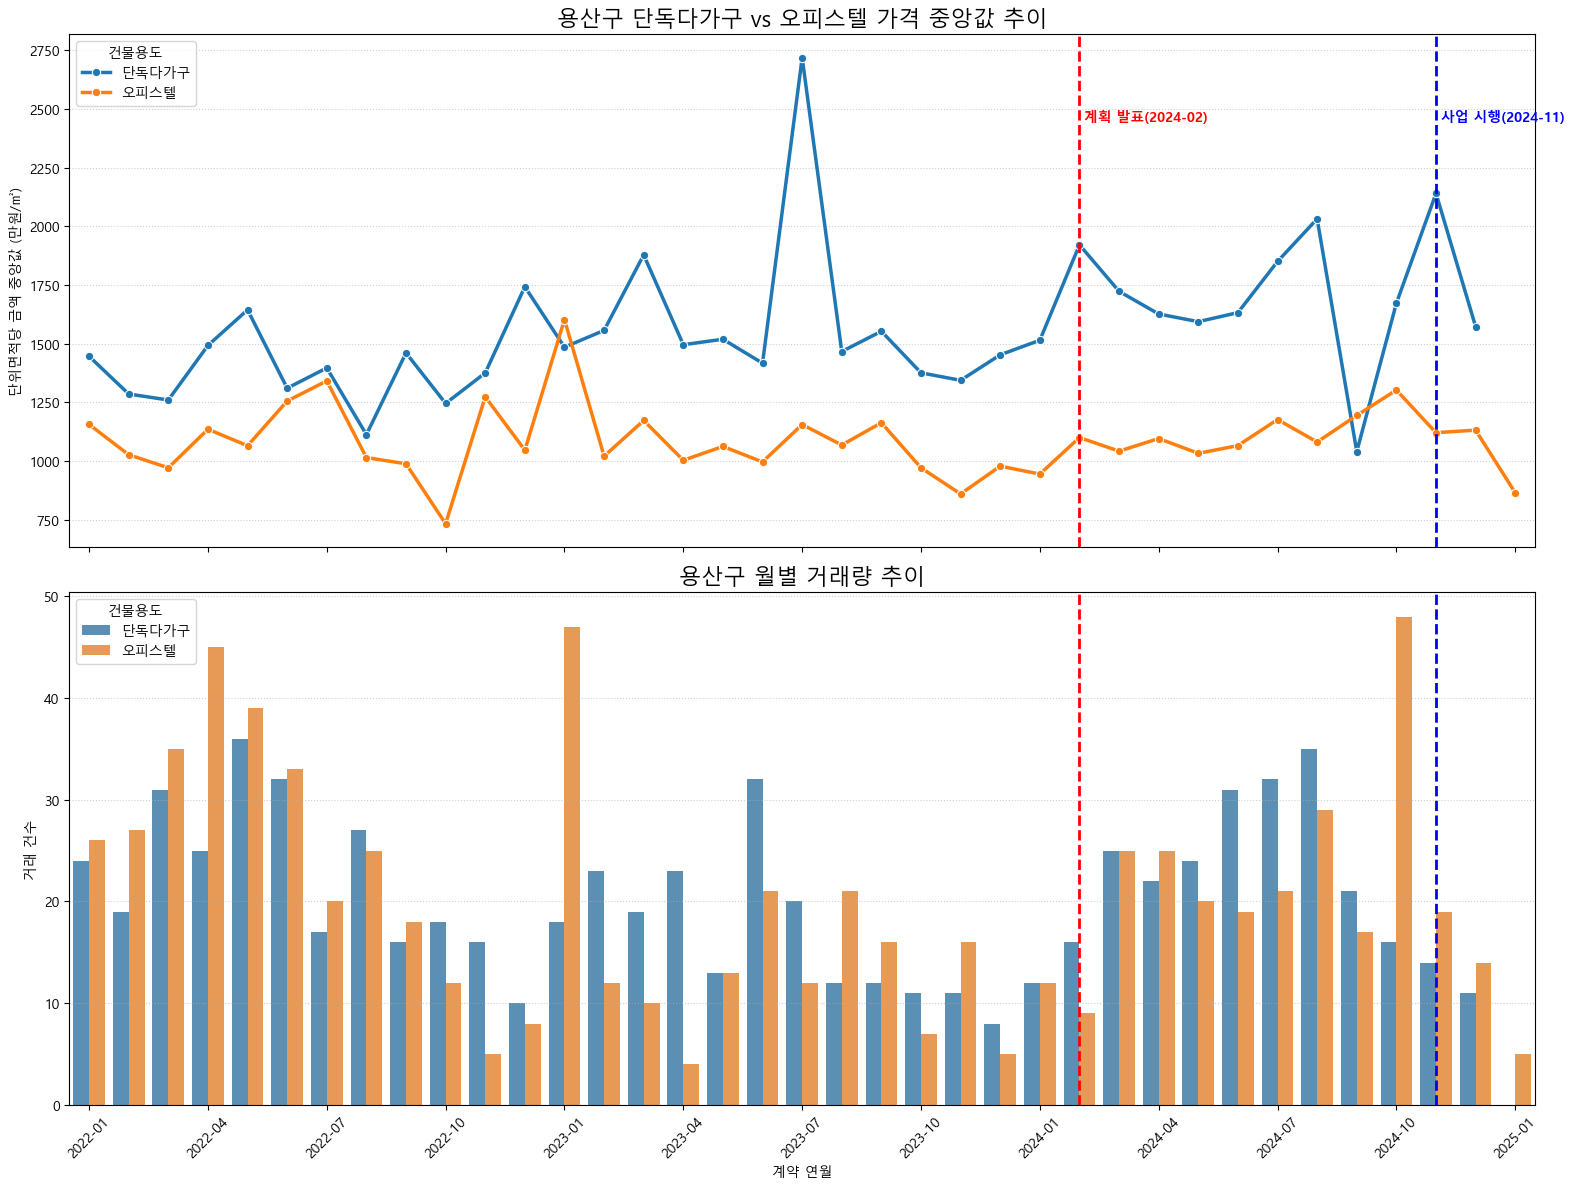

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import platform

# 1. 한글 폰트 및 환경 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드 및 전처리
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df = df[(df['계약일'] >= '2022-01-01') & (df['계약일'] <= '2025-12-31')].copy()
# 결측치 처리 - 계약일, 물건금액, 건물면적이 없으면 구하지 못함, 하나라도 없는 행 drop 처리
df = df.dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])

df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 3. 용산구 데이터 추출 (단독다가구, 오피스텔만 추출)
target_usage = ['단독다가구', '오피스텔']
yongsan_df = df[(df['자치구명'] == '용산구') & (df['건물용도'].isin(target_usage))].copy()

# 4. 월별 집계 (중앙값 및 거래건수)
yongsan_stats = yongsan_df.groupby(['연월', '건물용도'])['단위면적당금액'].agg(['median', 'count']).reset_index()

# 5. 시각화 (2단 그래프 구성)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# --- 상단: 가격 중앙값 추이 ---
sns.lineplot(data=yongsan_stats, x='연월', y='median', hue='건물용도', 
             marker='o', linewidth=2.5, ax=ax1, palette=['#1f77b4', '#ff7f0e'])

# 이벤트 선 추가 (상단)
a_date, an_date = '2024-02', '2024-11'
y_max_val = yongsan_stats['median'].max()

for d, txt, clr in zip([a_date, an_date], ['계획 발표', '사업 시행'], ['red', 'blue']):
    if d in yongsan_stats['연월'].values:
        ax1.axvline(x=d, color=clr, linestyle='--', linewidth=2)
        ax1.text(d, y_max_val * 0.9, f' {txt}({d})', color=clr, fontweight='bold')

ax1.set_title('용산구 단독다가구 vs 오피스텔 가격 중앙값 추이', fontsize=16)
ax1.set_ylabel('단위면적당 금액 중앙값 (만원/㎡)')
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)

# --- 하단: 거래량 추이 (막대 그래프) ---
sns.barplot(data=yongsan_stats, x='연월', y='count', hue='건물용도', ax=ax2, palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# 이벤트 선 추가 (하단)
for d, clr in zip([a_date, an_date], ['red', 'blue']):
    if d in yongsan_stats['연월'].values:
        ax2.axvline(x=d, color=clr, linestyle='--', linewidth=2)

ax2.set_title('용산구 월별 거래량 추이', fontsize=16)
ax2.set_ylabel('거래 건수')
ax2.set_xlabel('계약 연월')
ax2.grid(True, axis='y', linestyle=':', alpha=0.6)

# X축 레이아웃 정리
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

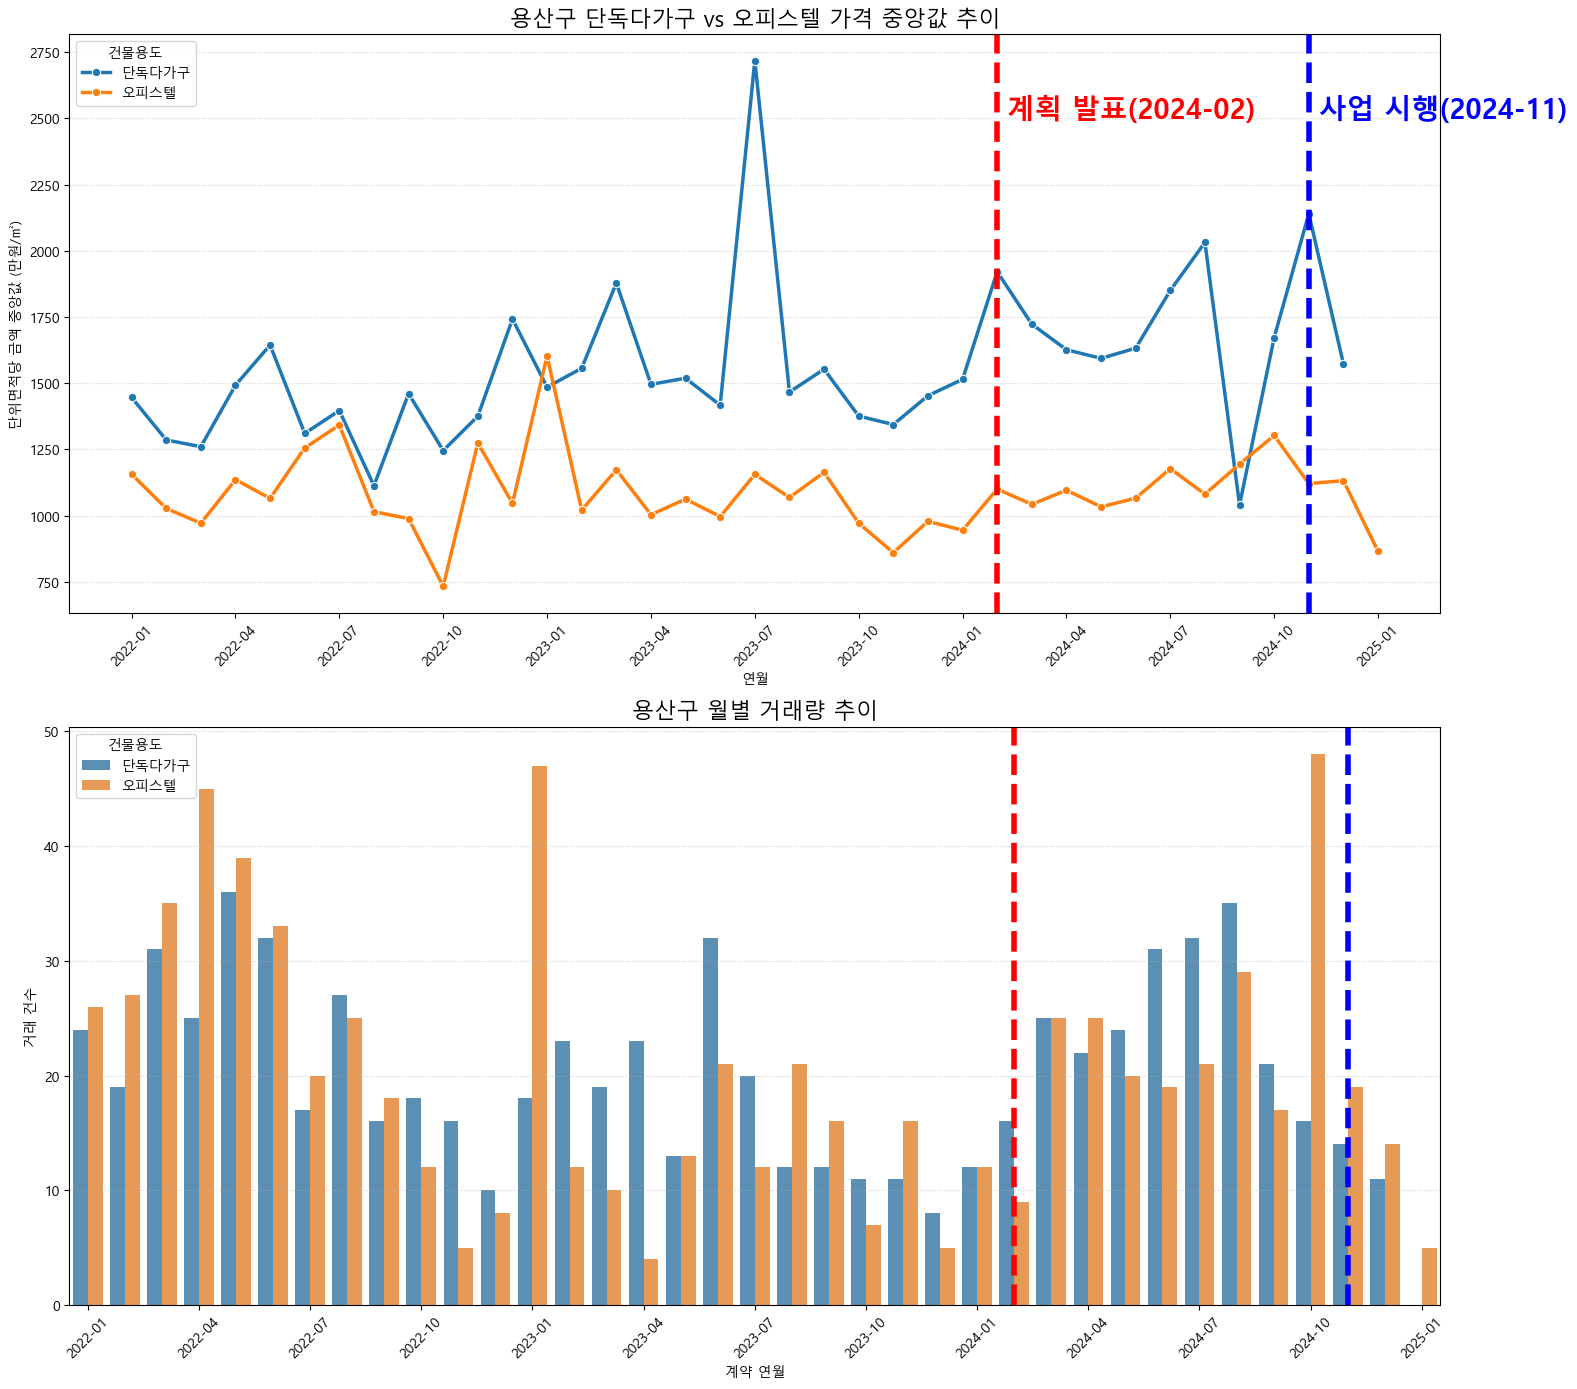

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import platform

# 1. 한글 폰트 및 환경 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드 및 전처리
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949', low_memory=False)
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df = df[(df['계약일'] >= '2022-01-01') & (df['계약일'] <= '2025-12-31')].copy()
df = df.dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])

df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 3. 용산구 데이터 추출 (단독다가구, 오피스텔만 추출)
target_usage = ['단독다가구', '오피스텔']
yongsan_df = df[(df['자치구명'] == '용산구') & (df['건물용도'].isin(target_usage))].copy()

# 4. 월별 집계 (중앙값 및 거래건수)
yongsan_stats = yongsan_df.groupby(['연월', '건물용도'])['단위면적당금액'].agg(['median', 'count']).reset_index()

# 5. 시각화 (sharex=False로 설정하여 상단 그래프에도 날짜 표시 가능하게 함)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False)

# --- 상단: 가격 중앙값 추이 ---
sns.lineplot(data=yongsan_stats, x='연월', y='median', hue='건물용도', 
             marker='o', linewidth=2.5, ax=ax1, palette=['#1f77b4', '#ff7f0e'])

# 이벤트 선 및 텍스트 추가 (글자 크기 확대)
a_date, an_date = '2024-02', '2024-11'
y_max_val = yongsan_stats['median'].max()

for d, txt, clr in zip([a_date, an_date], ['계획 발표', '사업 시행'], ['red', 'blue']):
    if d in yongsan_stats['연월'].values:
        ax1.axvline(x=d, color=clr, linestyle='--', linewidth=4)
        # fontsize를 14로 키우고 가독성을 위해 위치 소폭 조정
        ax1.text(d, y_max_val * 0.92, f' {txt}({d})', color=clr, fontweight='bold', fontsize=20)

ax1.set_title('용산구 단독다가구 vs 오피스텔 가격 중앙값 추이', fontsize=16)
ax1.set_ylabel('단위면적당 금액 중앙값 (만원/㎡)')
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)

# 상단 그래프 X축 설정 (날짜 표시)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax1.tick_params(axis='x', rotation=45, labelbottom=True) # labelbottom=True로 날짜 강제 표시

# --- 하단: 거래량 추이 (막대 그래프) ---
sns.barplot(data=yongsan_stats, x='연월', y='count', hue='건물용도', ax=ax2, palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# 이벤트 선 추가 (하단)
for d, clr in zip([a_date, an_date], ['red', 'blue']):
    if d in yongsan_stats['연월'].values:
        ax2.axvline(x=d, color=clr, linestyle='--', linewidth=4)

ax2.set_title('용산구 월별 거래량 추이', fontsize=16)
ax2.set_ylabel('거래 건수')
ax2.set_xlabel('계약 연월')
ax2.grid(True, axis='y', linestyle=':', alpha=0.6)

# 하단 그래프 X축 설정
ax2.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3차

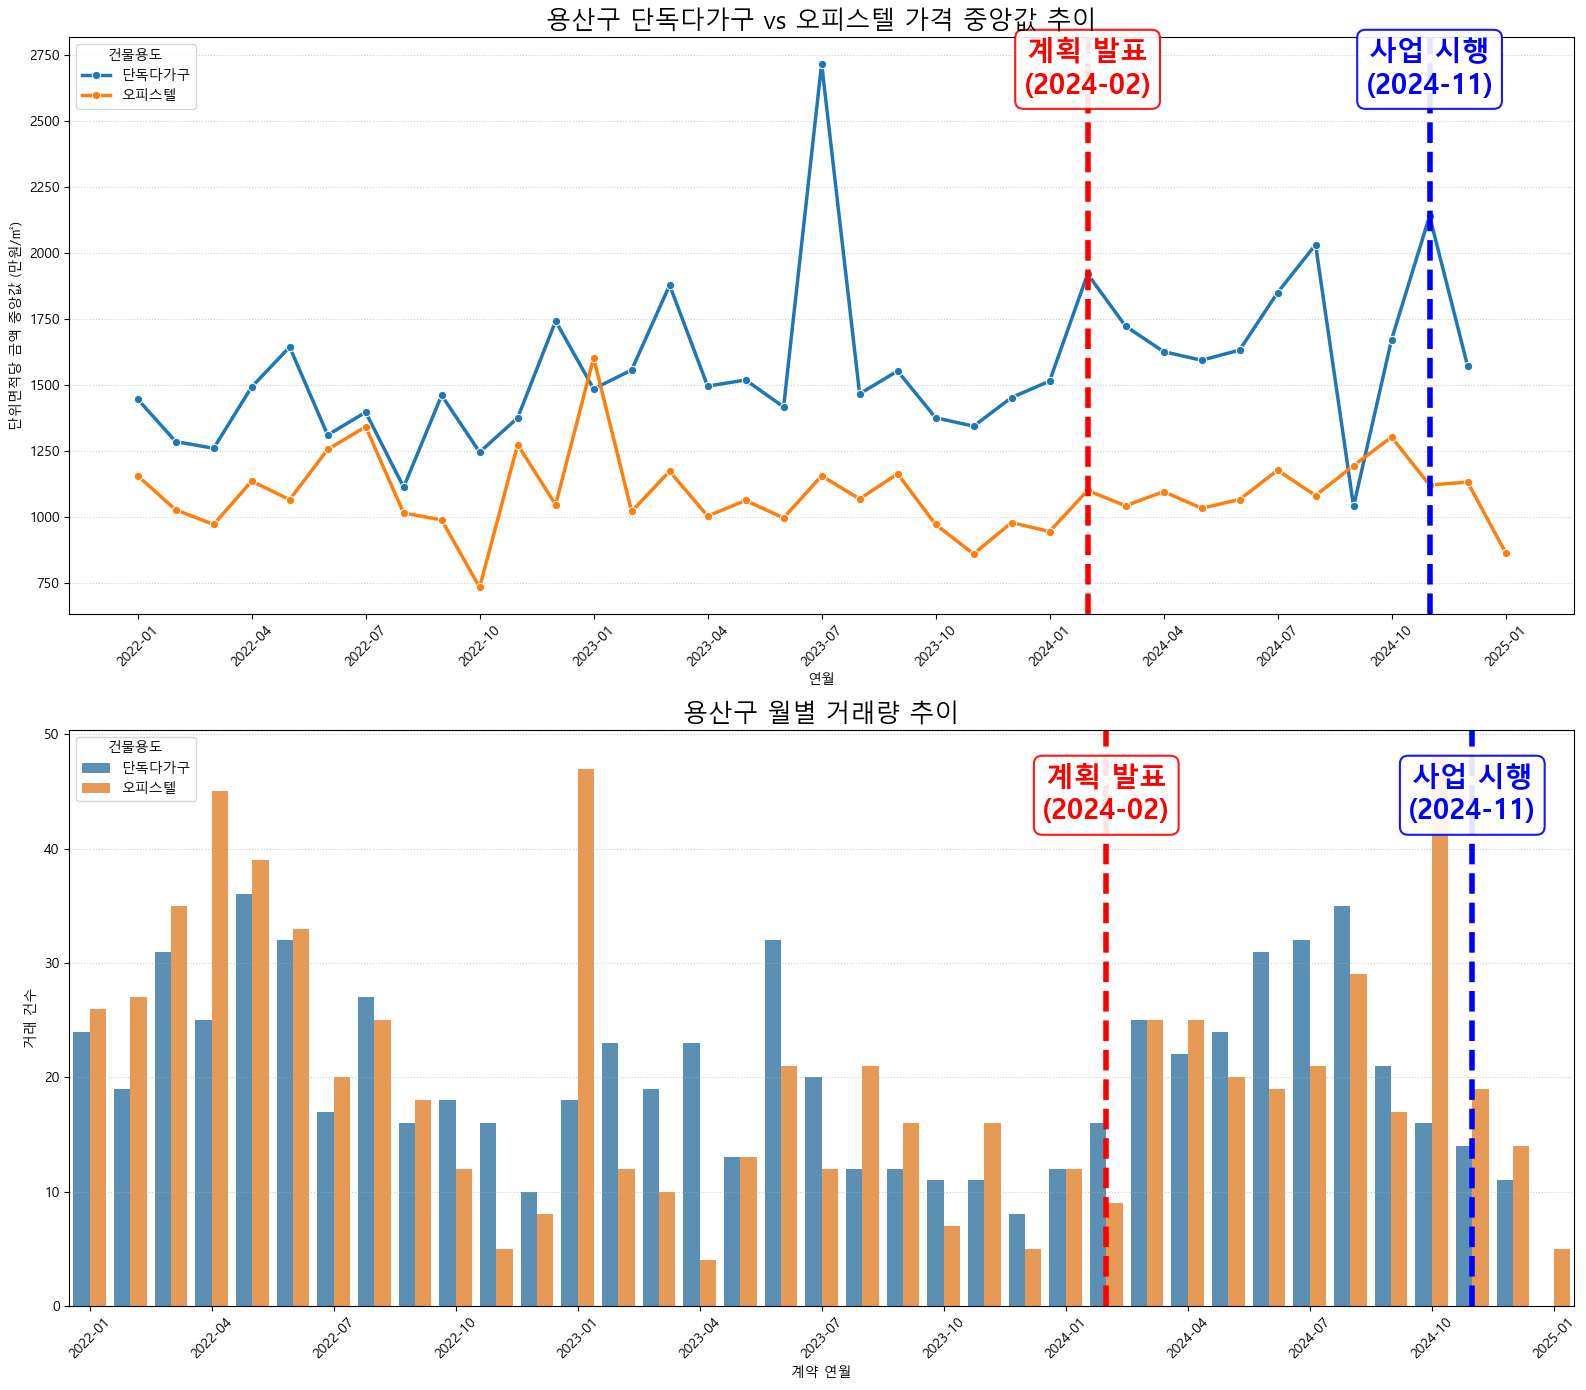

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import platform

# 1. 한글 폰트 및 환경 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드 및 전처리
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949', low_memory=False)
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df = df[(df['계약일'] >= '2022-01-01') & (df['계약일'] <= '2025-12-31')].copy()
df = df.dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])

df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 3. 용산구 데이터 추출
target_usage = ['단독다가구', '오피스텔']
yongsan_df = df[(df['자치구명'] == '용산구') & (df['건물용도'].isin(target_usage))].copy()

# 4. 월별 집계
yongsan_stats = yongsan_df.groupby(['연월', '건물용도'])['단위면적당금액'].agg(['median', 'count']).reset_index()

# 5. 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False)

# 공통 이벤트 설정
event_dates = ['2024-02', '2024-11']
event_labels = ['계획 발표', '사업 시행']
event_colors = ['red', 'blue']

# --- 상단: 가격 중앙값 추이 ---
sns.lineplot(data=yongsan_stats, x='연월', y='median', hue='건물용도', 
             marker='o', linewidth=2.5, ax=ax1, palette=['#1f77b4', '#ff7f0e'])

# 상단 그래프 Y축 범위 확인
y1_min, y1_max = ax1.get_ylim()

for d, txt, clr in zip(event_dates, event_labels, event_colors):
    if d in yongsan_stats['연월'].values:
        ax1.axvline(x=d, color=clr, linestyle='--', linewidth=4)
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec=clr, lw=1.5, alpha=0.9)
        
        # 위치 조정
        ax1.text(d, y1_max - 3, f'{txt}\n({d})', 
                 color=clr, fontweight='bold', fontsize=20,
                 bbox=bbox_props, va='top', ha='center')

ax1.set_title('용산구 단독다가구 vs 오피스텔 가격 중앙값 추이', fontsize=18)
ax1.set_ylabel('단위면적당 금액 중앙값 (만원/㎡)')
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax1.tick_params(axis='x', rotation=45, labelbottom=True)

# --- 하단: 거래량 추이 (막대 그래프) ---
sns.barplot(data=yongsan_stats, x='연월', y='count', hue='건물용도', ax=ax2, palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# 하단 그래프 Y축 범위 확인
y2_min, y2_max = ax2.get_ylim()

for d, txt, clr in zip(event_dates, event_labels, event_colors):
    if d in yongsan_stats['연월'].values:
        ax2.axvline(x=d, color=clr, linestyle='--', linewidth=4)
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec=clr, lw=1.5, alpha=0.9)
        
        # 위치 조정
        ax2.text(d, y2_max - 3, f'{txt}\n({d})', 
                 color=clr, fontweight='bold', fontsize=20,
                 bbox=bbox_props, va='top', ha='center')

ax2.set_title('용산구 월별 거래량 추이', fontsize=18)
ax2.set_ylabel('거래 건수')
ax2.set_xlabel('계약 연월')
ax2.grid(True, axis='y', linestyle=':', alpha=0.6)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 최종

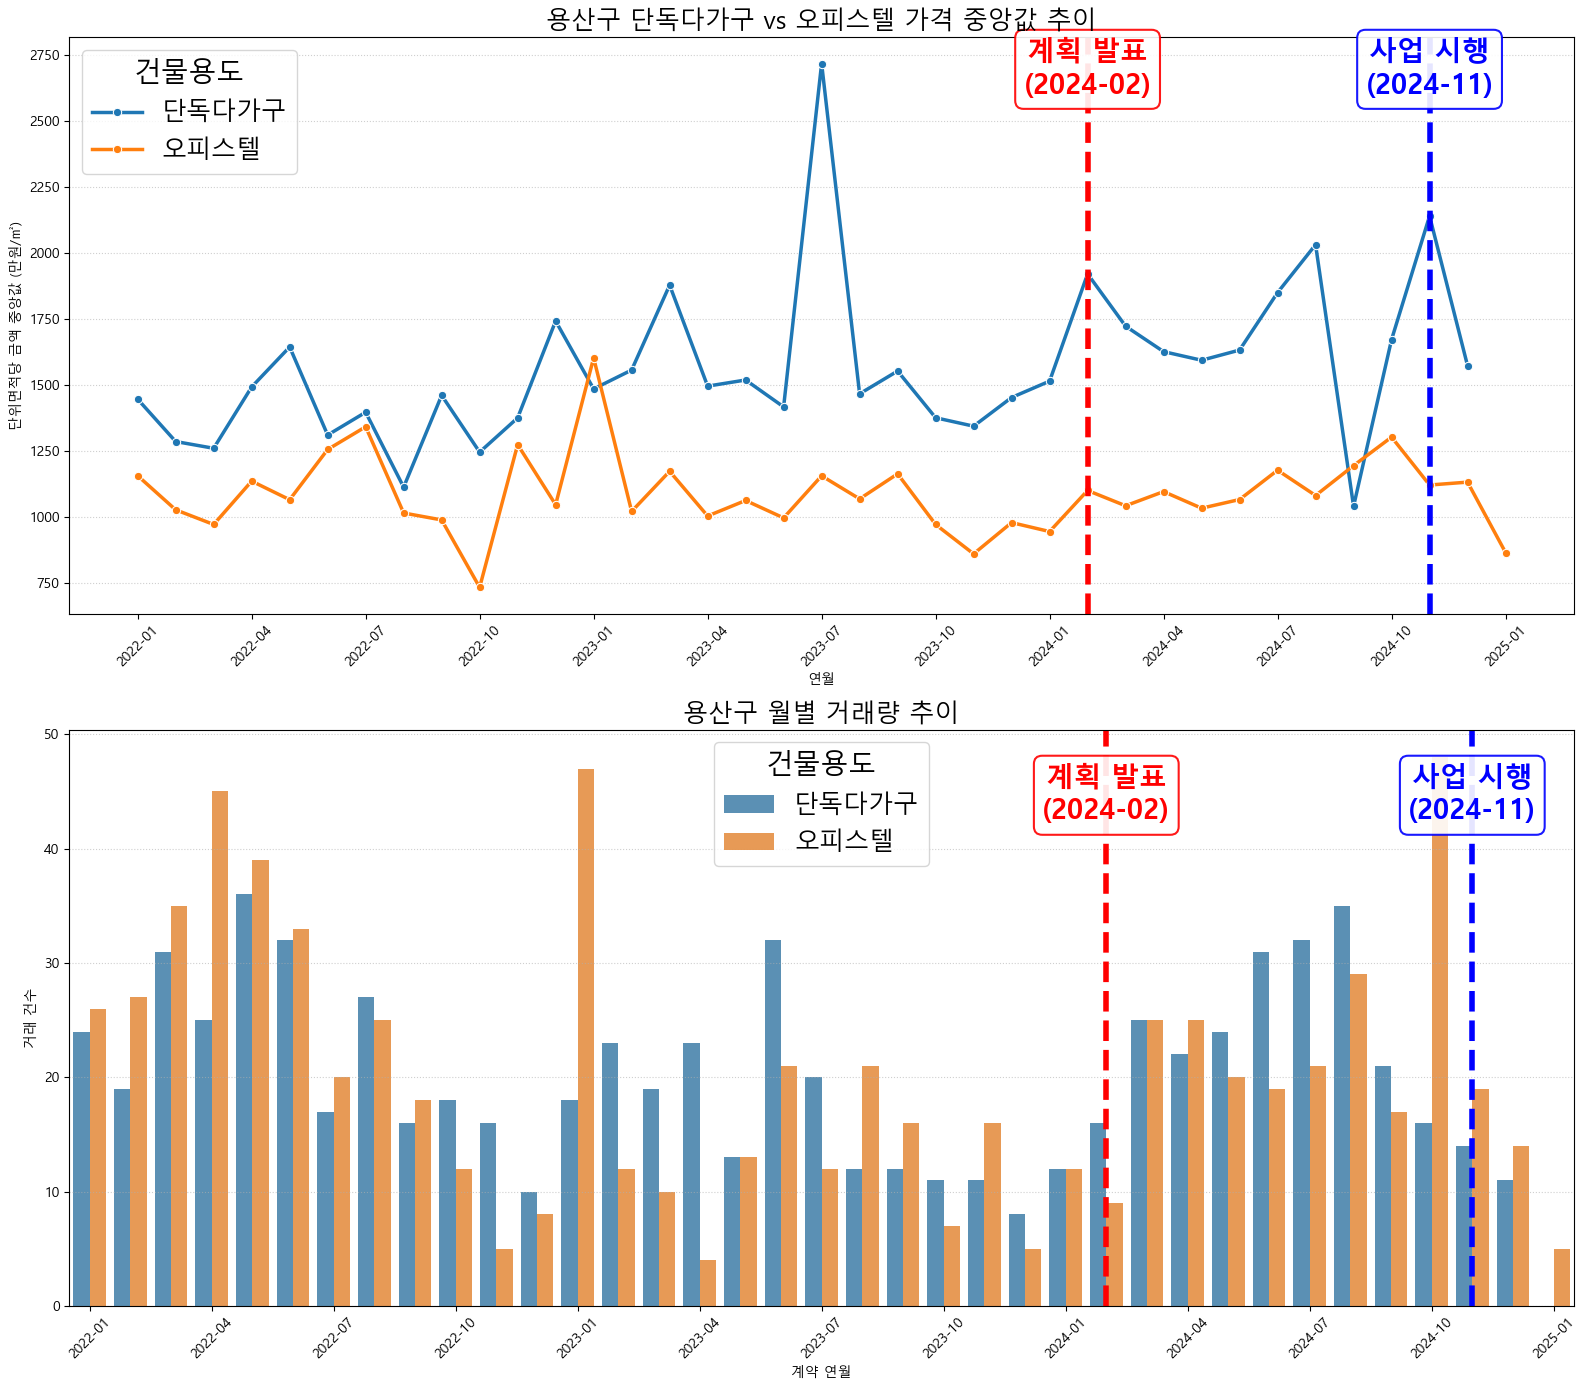

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import platform

# 1. 한글 폰트 및 환경 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드 및 결측값 처리, 전처리
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949', low_memory=False)

# 결측값 확인 자치구명에 nan 값 확인 결과 미아동은 용산구가 아니라 무시
# 물건 금액, 건물면적엔 nan 값 없음
dfnull = df[df['자치구명'].isnull()]
dfamou = df[df['물건금액(만원)'].isnull()]
dfbuil = df[df['건물면적(㎡)'].isnull()]

# 형식에 맞게 계약일 뽑아내기
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df = df[(df['계약일'] >= '2022-01-01') & (df['계약일'] <= '2025-12-31')].copy()
df = df.dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])

# 계약일에서 월별 추출
df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 3. 용산구 데이터 추출
target_usage = ['단독다가구', '오피스텔']
yongsan_df = df[(df['자치구명'] == '용산구') & (df['건물용도'].isin(target_usage))].copy()

# 건물용도에도 결측치 없음
yongsan_df[yongsan_df['건물용도'].isnull()]

# 4. 월별 집계
yongsan_stats = yongsan_df.groupby(['연월', '건물용도'])['단위면적당금액'].agg(['median', 'count']).reset_index()

# 5. 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False)

# 공통 이벤트 설정
event_dates = ['2024-02', '2024-11']
event_labels = ['계획 발표', '사업 시행']
event_colors = ['red', 'blue']

# --- 상단: 가격 중앙값 추이 ---
sns.lineplot(data=yongsan_stats, x='연월', y='median', hue='건물용도', 
             marker='o', linewidth=2.5, ax=ax1, palette=['#1f77b4', '#ff7f0e'])

# 범례 크기 조절
ax1.legend(title='건물용도', fontsize=18, title_fontsize=20)

# for문 돌려 이벤트 선 두개 추가
y1_min, y1_max = ax1.get_ylim()
for d, txt, clr in zip(event_dates, event_labels, event_colors):
    if d in yongsan_stats['연월'].values:
        ax1.axvline(x=d, color=clr, linestyle='--', linewidth=4)
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec=clr, lw=1.5, alpha=0.9)
        ax1.text(d, y1_max - 3, f'{txt}\n({d})', 
                 color=clr, fontweight='bold', fontsize=20,
                 bbox=bbox_props, va='top', ha='center')

ax1.set_title('용산구 단독다가구 vs 오피스텔 가격 중앙값 추이', fontsize=18)
ax1.set_ylabel('단위면적당 금액 중앙값 (만원/㎡)')
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax1.tick_params(axis='x', rotation=45, labelbottom=True)

# --- 하단: 거래량 추이 (막대 그래프) ---
sns.barplot(data=yongsan_stats, x='연월', y='count', hue='건물용도', ax=ax2, palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# 범례 크기 조절
ax2.legend(title='건물용도', fontsize=18, title_fontsize=20)

# for문 돌려 이벤트 선 두개 추가
y2_min, y2_max = ax2.get_ylim()
for d, txt, clr in zip(event_dates, event_labels, event_colors):
    if d in yongsan_stats['연월'].values:
        ax2.axvline(x=d, color=clr, linestyle='--', linewidth=4)
        bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec=clr, lw=1.5, alpha=0.9)
        ax2.text(d, y2_max - 3, f'{txt}\n({d})', 
                 color=clr, fontweight='bold', fontsize=20,
                 bbox=bbox_props, va='top', ha='center')

ax2.set_title('용산구 월별 거래량 추이', fontsize=18)
ax2.set_ylabel('거래 건수')
ax2.set_xlabel('계약 연월')
ax2.grid(True, axis='y', linestyle=':', alpha=0.6)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()